In [2]:
import networkx as nx
from community import community_louvain as cm
import numpy as np
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt

In [31]:
def robust_community(target,g):
    global freq_dict
    freq_dict={}
    max=100
    for node in list(g.nodes()):
        freq_dict[node]=0
    for i in range(0,max):
        # louvain partition
        partition = cm.best_partition(g)

        target_module=partition[target]

        for node in list(partition.keys()):
            if partition[node]==target_module:
                freq_dict[node]=freq_dict[node]+1
    freq_dict_filt = dict((k, v) for k, v in freq_dict.items() if v > 0)
    #Calculating size of module for each threshold
    lengths=[]
    for i in range(0,max):
        freq_dict_filt = dict((k, v) for k, v in freq_dict.items() if v > i)
        lengths.append(len(freq_dict_filt))
    plt.plot(lengths)
    plt.title('Frequency plot for nodes in {} community (100 trials)'.format(target))
    plt.xlabel('Number of times appearing in {} community'.format(target))
    plt.ylabel('Number of nodes')
    plt.show()
    return freq_dict

In [4]:
# read yeast protein interaction file
g = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)

In [5]:
# thresholding
threshold_score = 750
for edge in g.edges: 
    weight = list(g.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        g.remove_edge(edge[0],edge[1])

In [6]:
#remove essential nodes
file = open("essential_nodes.txt")
for line in file.readlines():
    node = line.strip()
    if node in g:
        g.remove_node(node)
file.close()

In [7]:
#select largest component
components = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(components[0])
print(g)

Graph with 4396 nodes and 44311 edges


In [8]:
# add new interactions
file = open("new_interactions.txt")
g1=nx.Graph(g)
new_interactions=[]
for line in file.readlines():
    node = line.strip()
    if node in g1:
        g1.add_edge('4932.YJR104C', node)
        new_interactions.append(node)
file.close()
print(new_interactions)

['4932.YDL106C', '4932.YDR451C', '4932.YML027W', '4932.YNL055C', '4932.YIL114C', '4932.YNL073W', '4932.YOR065W', '4932.YPL106C', '4932.YBR169C', '4932.YDR411C', '4932.YER177W', '4932.YDR099W', '4932.YNR051C', '4932.YNL121C', '4932.YHR117W', '4932.YIL016W', '4932.YAL005C', '4932.YLL024C', '4932.YBL075C', '4932.YER103W', '4932.YLR113W', '4932.YPR054W', '4932.YKR054C', '4932.YDR424C', '4932.YMR299C', '4932.YDR488C', '4932.YML124C', '4932.YPL116W', '4932.YIL095W']


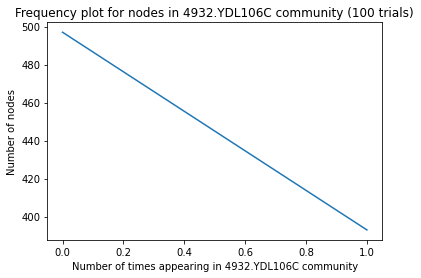

{'4932.Q0010': 0,
 '4932.YPL135W': 0,
 '4932.Q0017': 0,
 '4932.YOL103W': 0,
 '4932.YJR122W': 0,
 '4932.YGL043W': 0,
 '4932.YDR020C': 2,
 '4932.Q0143': 0,
 '4932.YBR031W': 0,
 '4932.Q0045': 0,
 '4932.Q0105': 0,
 '4932.Q0092': 0,
 '4932.Q0160': 0,
 '4932.Q0182': 0,
 '4932.Q0297': 0,
 '4932.YDR012W': 0,
 '4932.YDL020C': 0,
 '4932.YDL114W': 0,
 '4932.YLL027W': 0,
 '4932.Q0142': 0,
 '4932.YBL091C': 0,
 '4932.Q0032': 0,
 '4932.YPR067W': 0,
 '4932.Q0085': 0,
 '4932.YPL069C': 0,
 '4932.YML063W': 0,
 '4932.YLR089C': 2,
 '4932.YKL211C': 2,
 '4932.YLR441C': 0,
 '4932.YKL001C': 2,
 '4932.YKL149C': 0,
 '4932.YIL099W': 0,
 '4932.YAL058W': 0,
 '4932.YLL052C': 0,
 '4932.YML120C': 0,
 '4932.YOR187W': 0,
 '4932.YDL202W': 0,
 '4932.YMR287C': 0,
 '4932.YPR020W': 0,
 '4932.YPL172C': 0,
 '4932.YJL116C': 0,
 '4932.YGR033C': 0,
 '4932.YKL155C': 0,
 '4932.Q0055': 0,
 '4932.YGR021W': 0,
 '4932.YGL226W': 0,
 '4932.YDR375C': 0,
 '4932.YDR178W': 0,
 '4932.Q0065': 0,
 '4932.YLR067C': 0,
 '4932.YBR037C': 0,
 '4932.Y

In [19]:
#run robust community function on relevant nodes in the 'new interactions' list. 
robust_community('4932.YDL106C',g1)

In [30]:
#Fine tune choice of threshold by inspecting above plot
threshold=80 #choose different thresholds to test when the number of nodes drops to a stable number
freq_dict_filtered = dict((k, v) for k, v in freq_dict.items() if v > threshold)
print('Number of nodes =',len(freq_dict_filtered))
#Run the below to get the robust community once a good threshold has been chosen
# print('Robust community'=freq_dict_filtered.keys())

Number of nodes = 497
